In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ursse.phase_space_trajectory as pst
# import ursse_cpp.sync_motion_sim as sm
from config_ursse import get_from_config, get_path_from_config, save_to_config
from ursse.path_assistant import PathAssistant
import os
import valstore as vt
images_dir = os.path.join(get_path_from_config("URSSE_sync_motion_note_dir"),
                          "images")
shift = PathAssistant('shift_05_28_2021')
np_rand_seed = 1
from ursse.data_processing import load_one_pickle

iota_period_sec = get_from_config("IOTA_revolution_period")

images_dir = os.path.join(get_path_from_config("URSSE_sync_motion_note_dir"),
                          "images")
from ursse.utils import normalize, myhist

2el_001.ptu is garbage

In [2]:
files_1el = ['1el_000.ptu',
 '1el_001.ptu',
 '1el_002.ptu',
 '1el_003.ptu',
 '1el_004.ptu'
]
files_2el = [
    '2el_000.ptu',
 '2el_002.ptu',
 '2el_003.ptu',
 '2el_004.ptu']

In [3]:
revs = int(120/iota_period_sec)

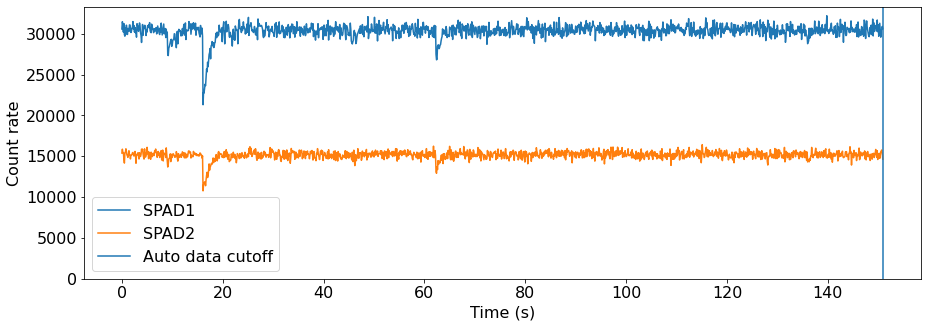

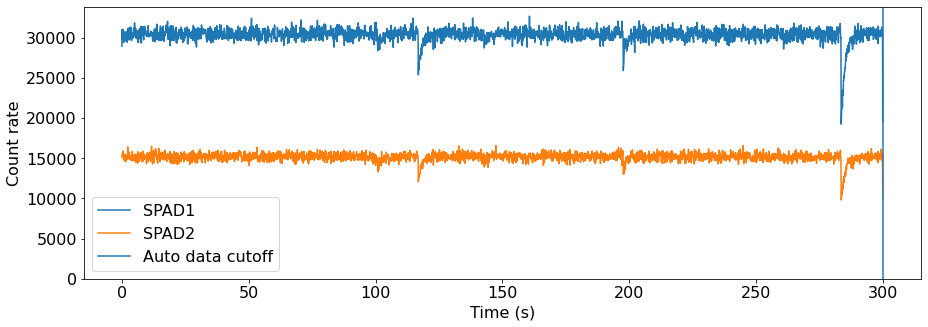

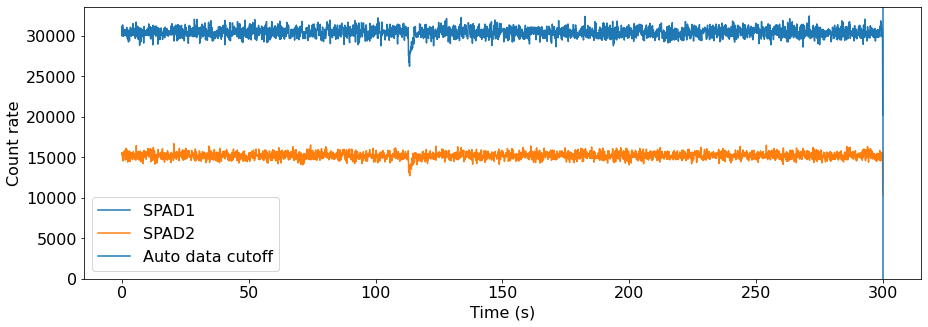

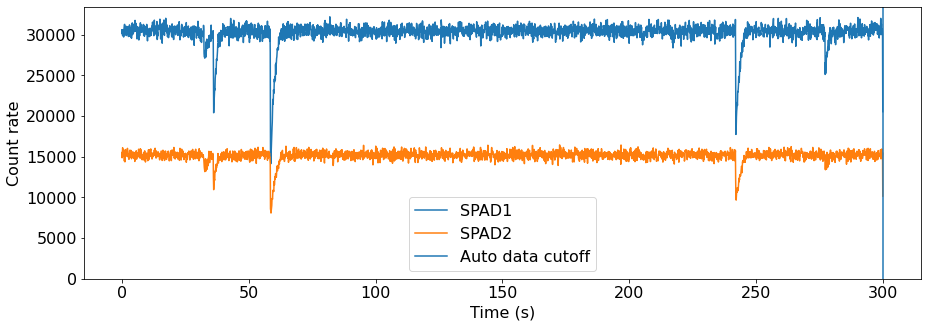

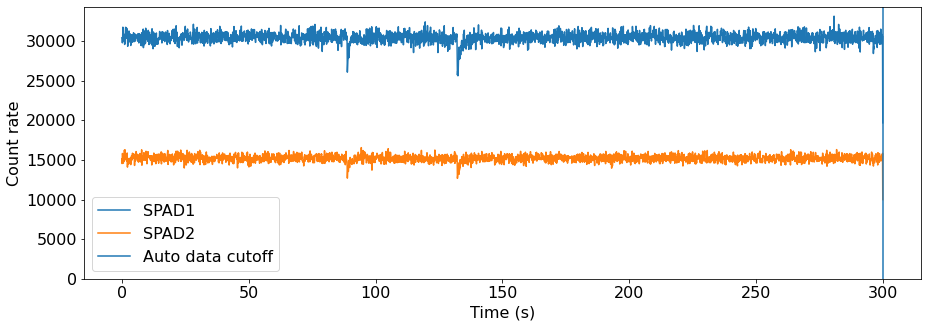

In [4]:
stds_1el = []
for file_1el in files_1el:
    dic_1el = load_one_pickle(shift.get_pickle_path(file_1el))
    df = dic_1el['clean_df'].reset_index(drop=True)
    max_revs = df['revolution'].iloc[-1]
    n_pieces = int(max_revs/revs)
    for i in range(n_pieces):
        df_1el = df[(df['revolution'] > i * revs) & (df['revolution'] < (i+1) * revs)].reset_index(drop=True)
        spad2_1el = df_1el[df_1el.diff()['revolution'] == 0]
        spad1_1el = df_1el.iloc[(spad2_1el.index - 1), :]
        coincidences_1el_df = pd.DataFrame({'delay1': spad1_1el['delay'].values,
                                       'delay2': spad2_1el['delay'].values})
        coincidences_1el_df['diff'] = coincidences_1el_df['delay1'] - coincidences_1el_df['delay2']
        std_1el = np.std(coincidences_1el_df['diff'])
        stds_1el.append(std_1el)

In [5]:
stds_1el

[504.92826796432735,
 508.7394621422772,
 498.38480918626954,
 501.9077983699806,
 480.9405784055899,
 519.8105410642094,
 511.52986186337927,
 506.6486200801411,
 519.273514638522]

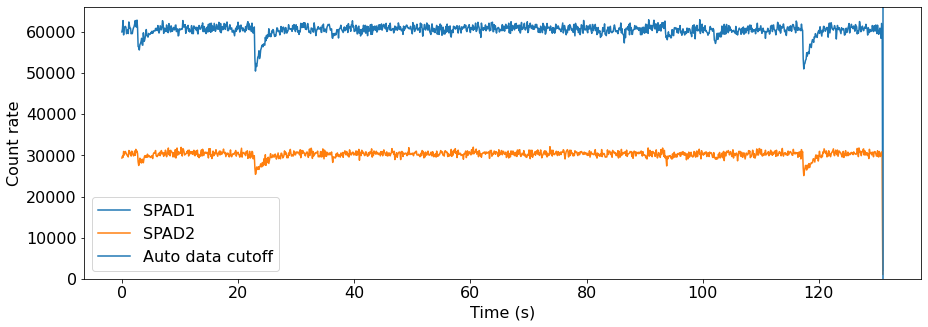

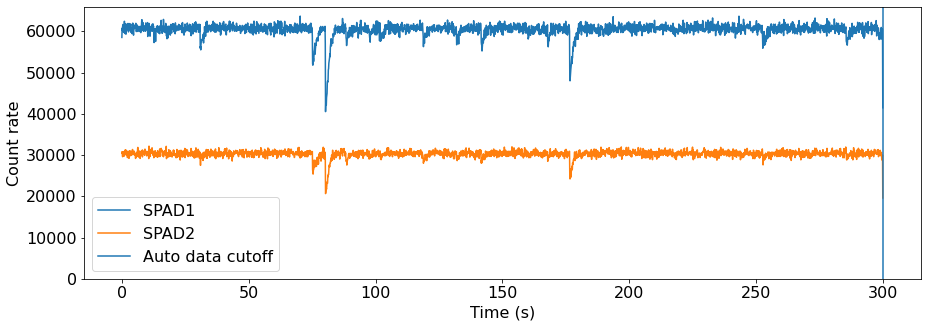

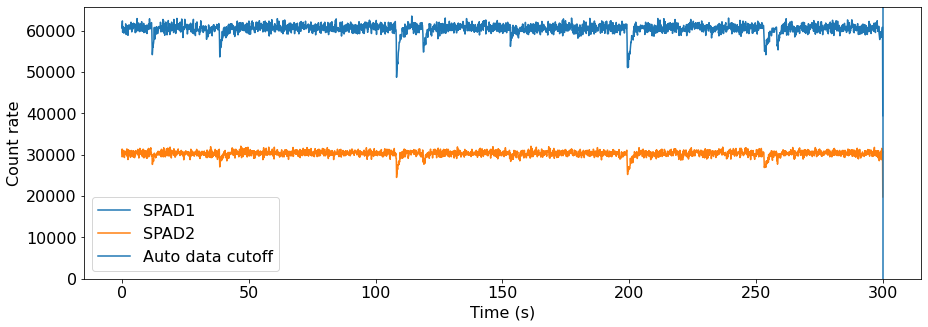

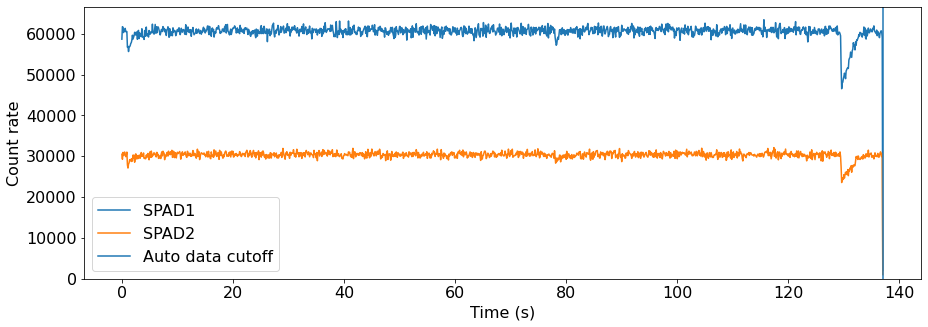

In [6]:
stds_2el = []
for file_1el in files_2el:
    dic_1el = load_one_pickle(shift.get_pickle_path(file_1el))
    df = dic_1el['clean_df'].reset_index(drop=True)
    max_revs = df['revolution'].iloc[-1]
    n_pieces = int(max_revs/revs)
    for i in range(n_pieces):
        df_1el = df[(df['revolution'] > i * revs) & (df['revolution'] < (i+1) * revs)].reset_index(drop=True)
        spad2_1el = df_1el[df_1el.diff()['revolution'] == 0]
        spad1_1el = df_1el.iloc[(spad2_1el.index - 1), :]
        coincidences_1el_df = pd.DataFrame({'delay1': spad1_1el['delay'].values,
                                       'delay2': spad2_1el['delay'].values})
        coincidences_1el_df['diff'] = coincidences_1el_df['delay1'] - coincidences_1el_df['delay2']
        std_2el = np.std(coincidences_1el_df['diff'])
        stds_2el.append(std_2el)

In [7]:
stds_2el

[563.9588718380613,
 559.9664473756504,
 568.8415237842266,
 564.1847555219963,
 576.2673792507434,
 573.2432777817321]

In [8]:
stds1 = np.array(stds_1el[:6])
stds2 = np.array(stds_2el)

In [9]:
s1 = np.sqrt(np.mean(stds1**2))
s2 = np.sqrt(np.mean(stds2**2))
st = np.sqrt(s2**2 - s1**2) # ps
sz = 3e8 * st *1e-12 * 1e2 # cm
s1, s2, st, sz

(502.5889789846626, 567.7718286962357, 264.1385387712706, 7.924156163138117)

In [10]:
szs = []
sstds1 = [np.sqrt(np.mean(x**2)) for x in stds1.reshape(-1,2)]
sstds2 = [np.sqrt(np.mean(x**2)) for x in stds2.reshape(-1,2)]
for ss1, ss2 in zip(sstds1,sstds2):
    szs.append(np.sqrt(ss2**2 - ss1**2))
sz_err = 3e8 *1e-12 * 1e2 * np.std(szs)
sz_err

0.4850846982339412

In [11]:
sz, sz_err

(7.924156163138117, 0.4850846982339412)

In [15]:
this_notebook = 'analyzing_collected_data/shifts/shift_05_28_2021/bunch_length_measurement_error.ipynb'
vt.newval("TwoPhotonSz", sz, "{:.1f}", 'cm',
          this_notebook)
vt.newval("TwoPhotonSzErr", sz_err, "{:.1f}", 'cm',
          this_notebook)
vt.newval("TwoPhotonSOne", 1e-3*s1, "{:.3f}", 'ns',
          this_notebook)
vt.newval("TwoPhotonSTwo", 1e-3*s2, "{:.3f}", 'ns',
          this_notebook)
vt.newval("TwoPhotonSt", st*1e-3, "{:.2f}", 'ns',
          this_notebook)